## Load barometric signal

           Date      Time  Pressure       Datetime
0    2022-01-15   0:00:00    1015.1   1/15/22 0:00
1    2022-01-15   0:05:00    1015.2   1/15/22 0:05
2    2022-01-15   0:10:00    1015.2   1/15/22 0:10
3    2022-01-15   0:15:00    1015.2   1/15/22 0:15
4    2022-01-15   0:20:00    1015.3   1/15/22 0:20
..          ...       ...       ...            ...
570  2022-01-16  23:35:00    1007.9  1/16/22 23:35
571  2022-01-16  23:40:00    1007.9  1/16/22 23:40
572  2022-01-16  23:45:00    1007.9  1/16/22 23:45
573  2022-01-16  23:50:00    1008.1  1/16/22 23:50
574  2022-01-16  23:55:00    1008.0  1/16/22 23:55

[575 rows x 4 columns]
Index(['Date', 'Time', 'Pressure', 'Datetime'], dtype='object')


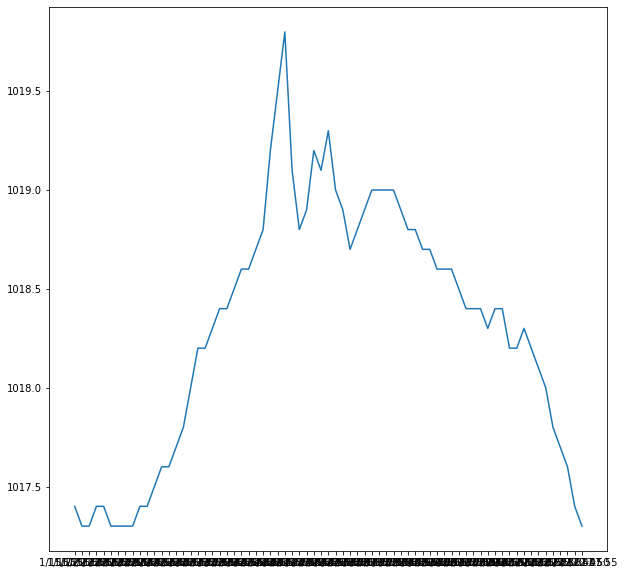

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('20220115_Tower313.csv')

print(df)

df2 = df[df['Datetime']>'1/15/22 12:00']
df2 = df2[df2['Datetime']<'1/15/22 18:00']

plt.figure(figsize=(10,10))
plt.plot_date(df2.iloc[:,3], df2.iloc[:,2], '-')
print(df.columns)

## Turn barometric signal into an ObsPy Trace

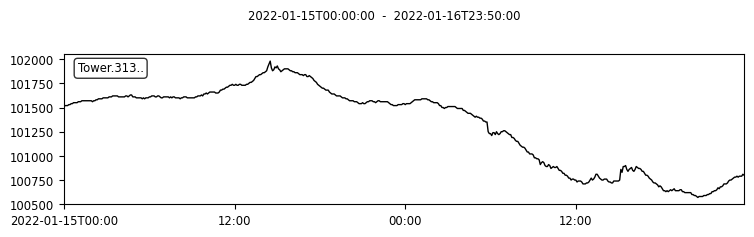

Tower.313.. | 2022-01-15T00:00:00.000000Z - 2022-01-16T23:50:00.000000Z | 300.0 s, 575 samples


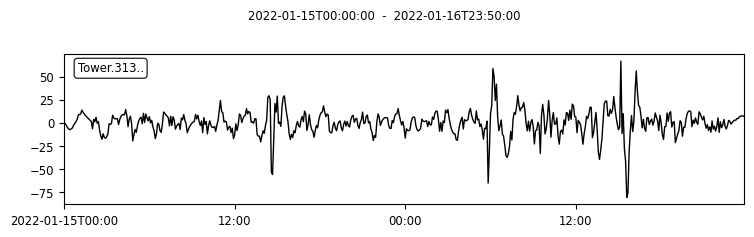

In [70]:
import obspy
import numpy as np
tr = obspy.Trace()
tr.data = np.array(df.Pressure)*100
tr.stats.starttime = obspy.UTCDateTime.strptime(df.Datetime[0], '%m/%d/%y %H:%M')
tr.stats.delta = 300.0
tr.stats.network = 'Tower'
tr.stats.station = '313'
tr.plot();

tr.detrend('linear')
tr.taper(0.05)
print(tr)
tr.filter('highpass', freq=1.0/7200, corners=4)
tr.plot();

### First signal has an amplitude of arguably 45 Pa or almost 90 Pa

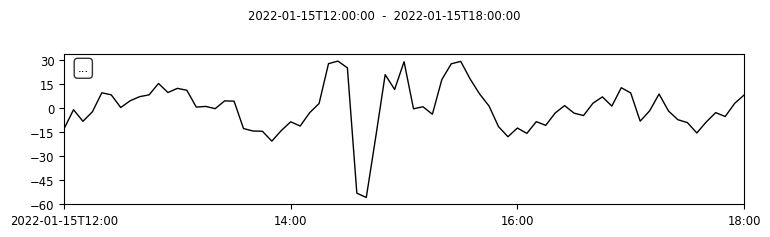

In [67]:
tr_first = tr.copy()
startt = tr.stats.starttime + 12 * 3600
endt = tr.stats.starttime + 18 * 3600
tr_first.trim(starttime=startt, endtime=endt)
tr_first.plot();

### 2nd signal has an amplitude of 60 Pa

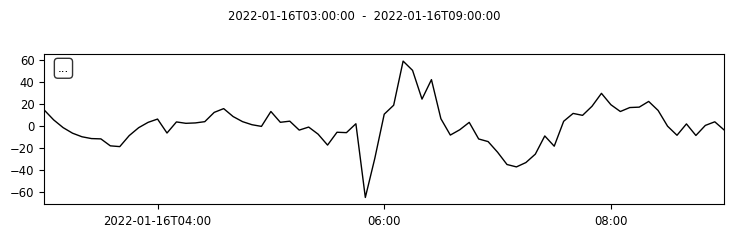

In [68]:
tr_second = tr.copy()
startt2 = tr.stats.starttime + 27 * 3600
endt2 = tr.stats.starttime + 33 * 3600
tr_second.trim(starttime=startt2, endtime=endt2)
tr_second.plot();

### 3rd signal has an amplitude of about 70 Pa

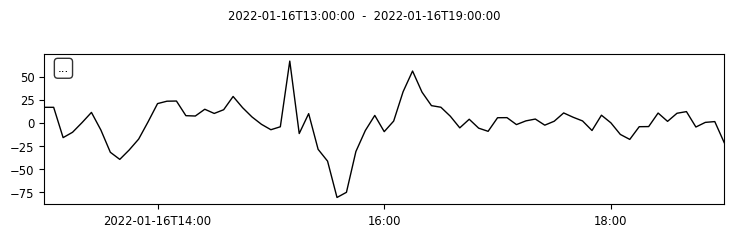

In [69]:
tr_third = tr.copy()
startt3 = tr.stats.starttime + 37 * 3600
endt3 = tr.stats.starttime + 43 * 3600
tr_third.trim(starttime=startt3, endtime=endt3)
tr_third.plot();

                  Datetime  Barometric Pressure
7      01/15/2022 00:00:00               1015.1
64     01/15/2022 00:05:00               1015.2
121    01/15/2022 00:10:00               1015.2
178    01/15/2022 00:15:00               1015.2
241    01/15/2022 00:20:00               1015.3
...                    ...                  ...
65329  01/18/2022 23:35:00               1022.9
65386  01/18/2022 23:40:00               1023.0
65443  01/18/2022 23:45:00               1023.0
65500  01/18/2022 23:50:00               1023.1
65557  01/18/2022 23:55:00               1023.2

[1151 rows x 2 columns]


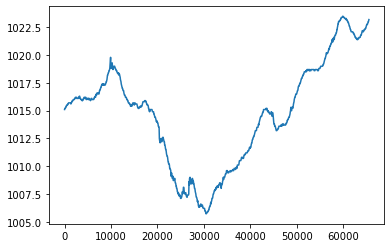

In [100]:
dfall = pd.read_csv('weather-tower-export-20224227024255.csv')
dfall = dfall[dfall['Barometric Pressure']>0]
dfall['Datetime']=dfall['Event Date']+' '+dfall['Event Time']
print(dfall[['Datetime', 'Barometric Pressure']])
plt.plot(dfall['Barometric Pressure'])

Tower.313.. | 2022-01-15T00:00:00.000000Z - 2022-01-18T23:50:00.000000Z | 300.0 s, 1151 samples


Text(0.5, 0.98, 'Barometric Pressure (Pa), filtered above 7200 s period')

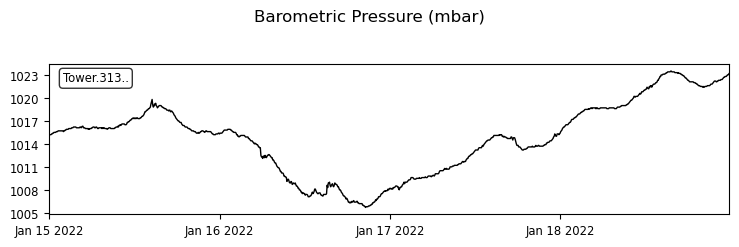

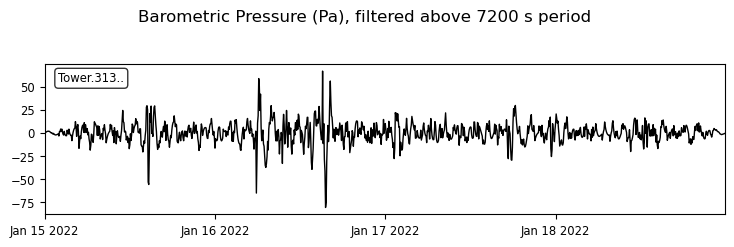

In [115]:
tr = obspy.Trace()
tr.data = np.array(dfall['Barometric Pressure'])
tr.stats.starttime = obspy.UTCDateTime.strptime(min(dfall['Datetime']), '%m/%d/%Y %H:%M:%S')
tr.stats.delta = 300.0
tr.stats.network = 'Tower'
tr.stats.station = '313'
h = tr.plot(handle=True);
h.suptitle('Barometric Pressure (mbar)')

tr.detrend('linear')
tr.taper(0.05)
print(tr)
tr.filter('highpass', freq=1.0/7200, corners=4)
tr.data = tr.data * 100 # from mbar to Pa
h2 = tr.plot(handle=True);
h2.suptitle('Barometric Pressure (Pa), filtered above 7200 s period')

In [106]:
print(h)

Figure(800x250)


In [107]:
get(h)

NameError: name 'get' is not defined

In [1]:
inv.plot()

NameError: name 'inv' is not defined